**BUSINESS PROBLEM**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.



For many incumbent operators, retaining high profitable customers is the number one business goal.



To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

**High-value churn**

In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.



In this project, we will define high-value customers based on a certain metric (mentioned below) and predict churn only on high-value customers.

The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

**Understanding the business objective and the data**

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

In [1]:
from google.colab import drive#mounting drive for accessing the dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings#import warnings to supress unnecessary warnings
warnings.filterwarnings('ignore')

**Importing required libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/telecom_churn_data.csv')#import and viewing the dataset
data

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.00
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.00
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.00
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.00


##### checking the summary statistics

In [5]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


##### checking the null values in the dataset

In [6]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

##### checking for missing values

In [7]:
#columns with null values are identified
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

arpu_3g_6            74.846748
night_pck_user_6     74.846748
total_rech_data_6    74.846748
arpu_2g_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
total_rech_amt_9      0.000000
total_rech_amt_8      0.000000
sep_vbc_3g            0.000000
Length: 226, dtype: float64

### Handling the date columns

In [8]:
var_date = data.select_dtypes(include = 'object').columns
var_date.shape

(12,)

In [9]:
for col in var_date:# converting object to datetime datatype
    data[col] = pd.to_datetime(data[col])

In [10]:
data[var_date].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      99999 non-null  datetime64[ns]
 1   last_date_of_month_7      99398 non-null  datetime64[ns]
 2   last_date_of_month_8      98899 non-null  datetime64[ns]
 3   last_date_of_month_9      98340 non-null  datetime64[ns]
 4   date_of_last_rech_6       98392 non-null  datetime64[ns]
 5   date_of_last_rech_7       98232 non-null  datetime64[ns]
 6   date_of_last_rech_8       96377 non-null  datetime64[ns]
 7   date_of_last_rech_9       95239 non-null  datetime64[ns]
 8   date_of_last_rech_data_6  25153 non-null  datetime64[ns]
 9   date_of_last_rech_data_7  25571 non-null  datetime64[ns]
 10  date_of_last_rech_data_8  26339 non-null  datetime64[ns]
 11  date_of_last_rech_data_9  25922 non-null  datetime64[ns]
dtypes: datetime64[ns](

In [11]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in data.columns:
    if data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass

data.drop(unique_1_col, axis=1, inplace = True)
print("\n The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model\n\n",
      unique_1_col)


 The following Columns are dropped from the dataset as their unique value is 1. (i.e.)It has no variance in the model

 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [12]:
data.shape

(99999, 210)

###### Handling missing values of meaningful attribute column

In [13]:
# Handling missing values with respect to `data recharge` attributes
data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(5)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0


In [14]:
for i in range(len(data)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((data['total_rech_data_6'][i]) and (data['max_rech_data_6'][i])):
        if pd.isnull(data['date_of_last_rech_data_6'][i]):
            data['total_rech_data_6'][i]=0
            data['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((data['total_rech_data_7'][i]) and (data['max_rech_data_7'][i])):
        if pd.isnull(data['date_of_last_rech_data_7'][i]):
            data['total_rech_data_7'][i]=0
            data['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((data['total_rech_data_8'][i]) and (data['max_rech_data_8'][i])):
        if pd.isnull(data['date_of_last_rech_data_8'][i]):
            data['total_rech_data_8'][i]=0
            data['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((data['total_rech_data_9'][i]) and (data['max_rech_data_9'][i])):
        if pd.isnull(data['date_of_last_rech_data_9'][i]):
            data['total_rech_data_9'][i]=0
            data['max_rech_data_9'][i]=0


print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above")

The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the condition explained above


Handling the missing values for the attributes count_rech_2g_*,count_rech_3g_* for month 6,7,8 and 9

In [15]:
# Checking the related columns values
data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


###### From the above tablular the column values of total_rech_data for each month from 6 to 9 respectively is the sum of the columns values of count_rech_2g for each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively, which derives to a multicollinearity issue. In order to reduce the multicollinearity, we can drop the columns count_rech_2g for each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively.

In [16]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9
data.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

print("The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column")

The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column


In [17]:
# The curent dimensions of the dataset
data.shape


(99999, 202)

###### Handling the missing values for the attributes arpu_3g_*,arpu_2g_* for month 6,7,8 and 9

In [18]:
# Checking the related columns values
data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [19]:
# Checking the correlation between the above mentioned columns in tabular for months 6,7,8 and 9
print("Correlation table for month 6\n\n", data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9      

From the above correlation table between attributes arpu_2g_* and arpu_3g_* for each month from 6 to 9 respectively is highly correlated to the attribute av_rech_amt_data_* for each month from 6 to 9 respectively.
Considering the high correlation between them, it is safer to drop the attributes arpu_2g_* and arpu_3g_*.

In [20]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
data.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")


The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset


In [21]:
# The curent dimensions of the dataset
data.shape

(99999, 194)

##### Handling the other attributes with higher missing value percentage

The column fb_user_* and night_pck_user_* for each month from 6 to 9 respectively has a missing values above 50% and does not seem to add any information to understand the data. Hence we can drop these columns for further analysis.

In [22]:
data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)


In [23]:
data.shape

(99999, 186)

#### Handling the missing values for the attributes av_rech_amt_data_* for month 6,7,8 and 9

In [24]:
# Checking the related columns values
data[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,NaN,0.0,0.0
8,177.0,154.0,2.0
9,154.0,154.0,1.0


From the above tabular it is deduced that the missing values for the column av_rech_amt_data_* for each month from 6 to 9 can be replaced as 0 if the total_rech_data_* for each month from 6 to 9 respectively is 0. i.e. if the total recharge done is 0 then the average recharge amount shall also be 0.

In [25]:
# Code for conditional imputation

for i in range(len(data)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(data['av_rech_amt_data_6'][i]) and (data['total_rech_data_6'][i]==0)):
        data['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(data['av_rech_amt_data_7'][i]) and (data['total_rech_data_7'][i]==0)):
        data['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(data['av_rech_amt_data_8'][i]) and (data['total_rech_data_8'][i]==0)):
        data['av_rech_amt_data_8'][i] = 0

  # Handling `av_rech_amt_data`  for month 9
    if (pd.isnull(data['av_rech_amt_data_9'][i]) and (data['total_rech_data_9'][i]==0)):
        data['av_rech_amt_data_9'][i] = 0




print("\nThe columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above\n")


The columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are imputed with 0 based on the condition explained above



In [26]:
# Checkng the overall missing values in the dataset
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
og_others_9                  7.75
                            ...  
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
total_rech_amt_8             0.00
sep_vbc_3g                   0.00
Length: 186, dtype: float64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


From the above results, we can conclude, the date_of_last_rech_data_* corresponding to months 6,7,8 and 9 are of no value after the conditional imputation of of columns total_rech_data_*, max_rech_data_*are completes.
Also the missing value percentage is high for these columns and can be dropped from the dataset.

In [28]:
# Dropping the columns related to datetime dtype from the dataset
data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)

In [29]:
# Checkng the overall missing values in the dataset
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False)

loc_og_t2f_mou_9    7.75
std_og_t2t_mou_9    7.75
std_ic_t2f_mou_9    7.75
loc_og_t2m_mou_9    7.75
std_ic_t2m_mou_9    7.75
                    ... 
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
total_rech_amt_8    0.00
sep_vbc_3g          0.00
Length: 182, dtype: float64

As we can no more utilise the datetime column, we can drop the date_of_last_rech_data_* column corresponding to months 6,7,8 and 9 respectively.

In [30]:
# Dropping the columns related to datetime dtype from the dataset
data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)

In [31]:
# The curent dimensions of the dataset
data.shape

(99999, 178)

Since the columns used to determine the High Value Customer is clear of null values, we can filter the overall data and then handle the remaining missing values for each column

##### Filtering the High Value Customer from Good Phase

In [32]:
# Filtering the data
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average rechage amount done.

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
data['total_rech_amt_data_6']=data['av_rech_amt_data_6'] * data['total_rech_data_6']
data['total_rech_amt_data_7']=data['av_rech_amt_data_7'] * data['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
data['overall_rech_amt_6'] = data['total_rech_amt_data_6'] + data['total_rech_amt_6']
data['overall_rech_amt_7'] = data['total_rech_amt_data_7'] + data['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
data['avg_rech_amt_6_7'] = (data['overall_rech_amt_6'] + data['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = data['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
data = data[data['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  478.0 



In [33]:
# The curent dimension of the dataset
data.shape

(30001, 183)

The total number of customers is now limited to ~30k who lies under the High Value customer criteria basen upon which the model is built.

In [34]:
# Let us check the missing values percentages again for the HVC group
    # Checkng the overall missing values in the dataset
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9    6.34
spl_og_mou_9        6.34
loc_og_t2m_mou_9    6.34
loc_og_t2f_mou_9    6.34
loc_ic_t2t_mou_9    6.34
                    ... 
max_rech_amt_8      0.00
max_rech_amt_7      0.00
max_rech_amt_6      0.00
total_rech_amt_9    0.00
avg_rech_amt_6_7    0.00
Length: 183, dtype: float64

*** The remaining attributes with missing value can be imputed using the advanced imputation technique like KNNImputer.***

In [35]:
# Numerical columns available
num_col = data.select_dtypes(include = ['int64','float64']).columns.tolist()

In [36]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
data[num_col]=scalar.fit_transform(data[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)


data_knn = pd.DataFrame(knn.fit_transform(data[num_col]))
data_knn.columns=data[num_col].columns



In [37]:
# check for any null values after imputation for numerical columns
data_knn.isnull().sum().sum()

0

The KNN Imputer has replaced all the null values in the numerical column usingK-means algorithm sucessfully

In [38]:
# Since we sclaed the numerical columns for the purpose of handling the null values,
    #we can restore the sclaed alues to its original form.

# Converting the scaled data back to the original data
data[num_col]=scalar.inverse_transform(data_knn)

# Checking the top 10 data
data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,802.0,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,315.0,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,720.0,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,604.0,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.000000,0.00,0.000000,0.00,...,1328.0,358.10,2706.83,1714.67,0.00,5285.0,20424.0,6343.0,23230.0,14786.5
38,7.000815e+09,363.987,486.558,393.909,391.709,248.99,619.960000,666.38,494.790000,88.86,...,1155.0,0.00,0.00,0.00,0.00,0.0,0.0,420.0,636.0,528.0
41,7.000721e+09,482.832,425.764,229.769,143.596,86.39,118.880000,80.44,40.060000,232.36,...,2010.0,0.00,0.00,0.00,0.00,0.0,0.0,496.0,510.0,503.0
48,7.000294e+09,1873.271,575.927,179.218,1189.744,2061.69,881.430000,156.91,1589.230000,1087.76,...,1265.0,0.00,0.00,0.00,0.00,0.0,0.0,2317.0,580.0,1448.5
53,7.002189e+09,978.077,1141.296,706.020,1076.247,135.14,119.590000,102.69,99.830000,479.31,...,697.0,0.00,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0


In [39]:
# Checking the overall missing values in the dataset
((data.isnull().sum()/data.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number       0.0
isd_ic_mou_8        0.0
ic_others_6         0.0
ic_others_7         0.0
ic_others_8         0.0
                   ... 
spl_og_mou_8        0.0
spl_og_mou_9        0.0
og_others_6         0.0
og_others_7         0.0
avg_rech_amt_6_7    0.0
Length: 183, dtype: float64

In [40]:
# Reconfirming for missing values if any
data.isnull().sum().sum()

0

### Defining Churn variable

As explained above in the introduction, we are deriving based on usage based for this model.

For that, we need to find the derive churn variable using total_ic_mou_9,total_og_mou_9,vol_2g_mb_9 and vol_3g_mb_9 attributes

In [41]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
data[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [42]:
# Initializing the churn variable.
data['churn']=0

# Imputing the churn values based on the condition
data['churn'] = np.where(data[churn_col].sum(axis=1) == 0, 1, 0)

In [43]:
data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,53.27,24.613333,0.00,33.590000,84.23,...,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,500.000,57.84,54.680000,52.29,65.276667,453.43,...,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,1
8,7.001525e+09,378.721,492.223,137.362,166.787,413.69,351.030000,35.08,33.460000,94.66,...,21.03,910.65,122.16,0.00,0.0,354.0,437.0,955.0,696.0,0
21,7.002124e+09,514.453,597.753,637.760,578.596,102.41,132.110000,85.14,161.630000,757.93,...,0.00,0.00,0.00,0.00,0.0,0.0,600.0,680.0,640.0,0
23,7.000887e+09,74.350,193.897,366.966,811.480,48.96,50.660000,33.58,15.740000,85.41,...,40.45,51.86,0.00,0.00,0.0,712.0,0.0,1166.0,583.0,0
33,7.000150e+09,977.020,2362.833,409.230,799.356,0.00,0.000000,0.00,0.000000,0.00,...,358.10,2706.83,1714.67,0.00,5285.0,20424.0,6343.0,23230.0,14786.5,0
38,7.000815e+09,363.987,486.558,393.909,391.709,248.99,619.960000,666.38,494.790000,88.86,...,0.00,0.00,0.00,0.00,0.0,0.0,420.0,636.0,528.0,0
41,7.000721e+09,482.832,425.764,229.769,143.596,86.39,118.880000,80.44,40.060000,232.36,...,0.00,0.00,0.00,0.00,0.0,0.0,496.0,510.0,503.0,0
48,7.000294e+09,1873.271,575.927,179.218,1189.744,2061.69,881.430000,156.91,1589.230000,1087.76,...,0.00,0.00,0.00,0.00,0.0,0.0,2317.0,580.0,1448.5,0
53,7.002189e+09,978.077,1141.296,706.020,1076.247,135.14,119.590000,102.69,99.830000,479.31,...,0.00,0.00,0.00,0.00,344.0,575.0,1503.0,1947.0,1725.0,0


0    91.863605
1     8.136395
Name: churn, dtype: float64


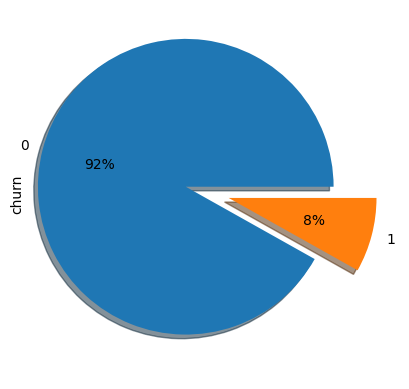

In [44]:
# lets find out churn/non churn percentage
exp=[0.2,0.1]
print((data['churn'].value_counts()/len(data))*100)
((data['churn'].value_counts()/len(data))*100).plot.pie(explode=exp,autopct='%.0f%%',shadow=True)
plt.show()

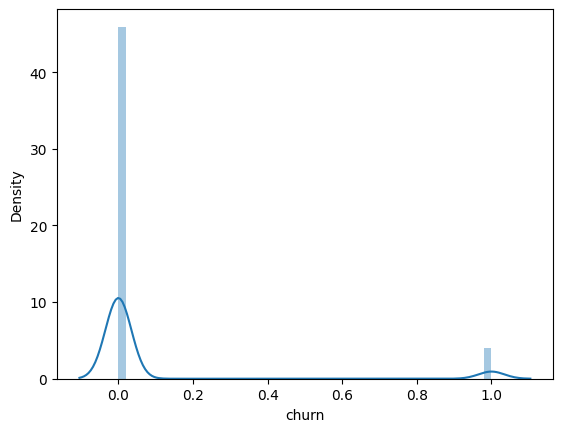

In [45]:
# Distribution of target variable

sns.distplot(data['churn'])
plt.show()

#### Observation:

###### As we can see that 91% of the customers do not churn, there is a possibility of class imbalance

Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _9) can be dropped forn the dataset.

In [46]:
# Selecting all the churn phase columns in order to drop then

churn_phase_cols = [col for col in data.columns if '_9' in col]
print("The columns from churn phase are:\n",churn_phase_cols)

The columns from churn phase are:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [47]:
# Dropping the selected churn phase columns
data.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
data.shape

(30001, 141)

We can still clean the data by dropping few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those columns during creation.

In [48]:
data.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.



##### Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [49]:
# creating a list of column names for each month
mon_6_cols = [col for col in data.columns if '_6' in col]
mon_7_cols = [col for col in data.columns if '_7' in col]
mon_8_cols = [col for col in data.columns if '_8' in col]

In [50]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
data_corr = data.corr()
data_corr.loc[:,:] = np.tril(data_corr, k=-1)
data_corr = data_corr.stack()
data_corr
data_corr[(data_corr > 0.80) | (data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                0.955351
isd_og_mou_8        isd_og_mou_7          0.943433
                    isd_og_mou_6          0.919641
isd_og_mou_7        isd_og_mou_6          0.916237
sachet_2g_8         total_rech_data_8     0.900629
total_ic_mou_6      loc_ic_mou_6          0.895099
total_ic_mou_8      loc_ic_mou_8          0.893072
total_ic_mou_7      loc_ic_mou_7          0.883070
std_og_t2t_mou_8    onnet_mou_8           0.860483
std_og_t2t_mou_7    onnet_mou_7           0.860275
std_og_t2t_mou_6    onnet_mou_6           0.859593
avg_rech_amt_6_7    overall_rech_amt_7    0.856275
std_og_t2m_mou_7    offnet_mou_7          0.854685
std_og_t2m_mou_8    offnet_mou_8          0.851049
total_og_mou_8      std_og_mou_8          0.848858
total_og_mou_7      std_og_mou_7          0.848825
loc_ic_mou_8        loc_ic_t2m_mou_8      0.847512
std_ic_mou_8        std_ic_t2m_mou_8      0.845590
loc_ic_mou_6        loc_ic_t2m_mou_6      0.844418
loc_og_mou_8        loc_og_mou_

In [51]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
data.drop(col_to_drop, axis=1, inplace=True)

In [52]:
# The curent dimension of the dataset after dropping few unwanted columns
data.shape

(30001, 121)

#### Deriving new variables to understand the data

In [53]:
#We can derive new variables from this to explain the data w.r.t churn.
data['tenure']= (data['aon']/30).round(0)



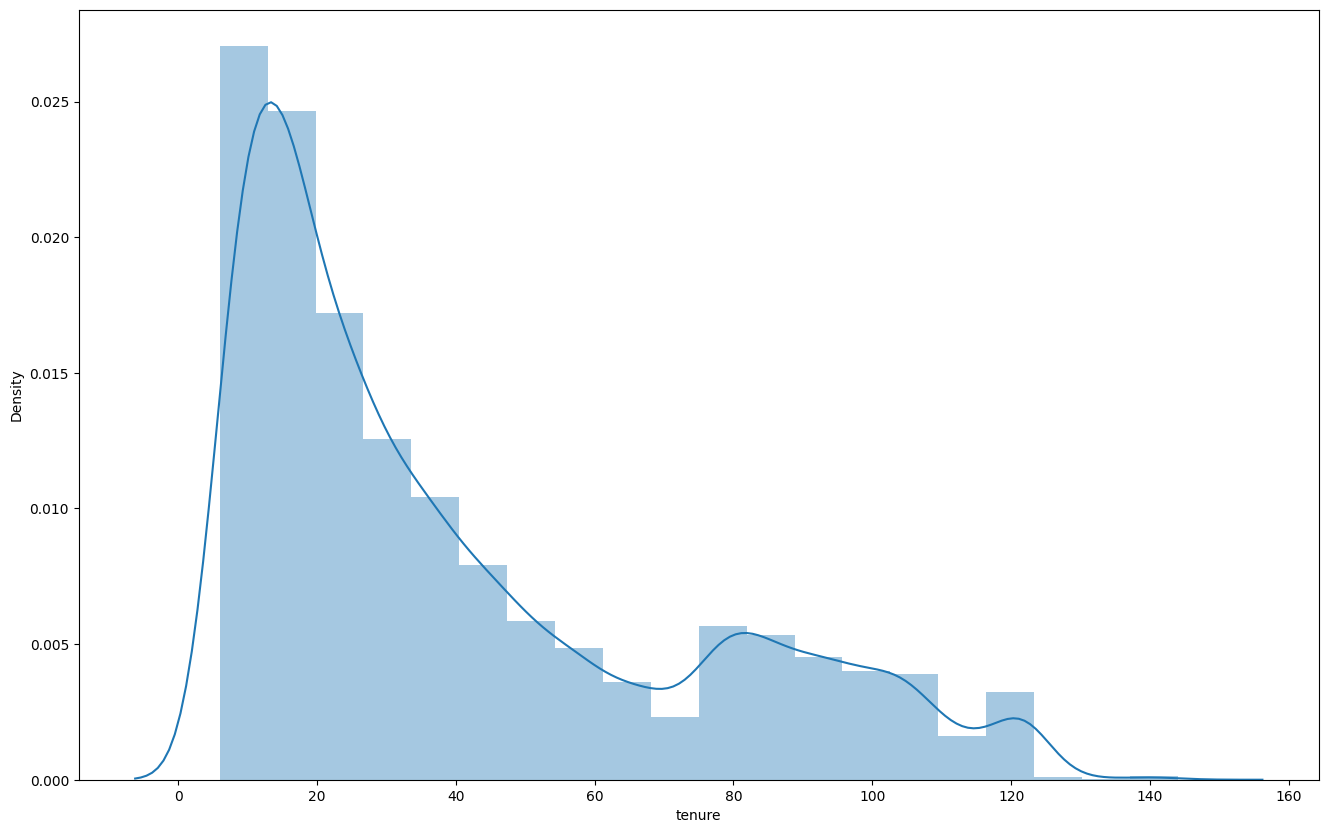

In [54]:
# Checking the distribution of he tenure variable
plt.figure(figsize=(16,10))
sns.distplot(data['tenure'], bins=20)
plt.show()

In [55]:
t_range = [0, 6, 12, 24, 60, 61]
t_label = [ '0-6 months', '6-12 months', '1-2 years', '2-5 years', '>5 years']
data['tenure_range'] = pd.cut(data['tenure'], t_range, labels= t_label)
data['tenure_range'].head()

0       2-5 years
7       2-5 years
8     6-12 months
21      1-2 years
23      1-2 years
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 months' < '6-12 months' < '1-2 years' < '2-5 years' < '>5 years']

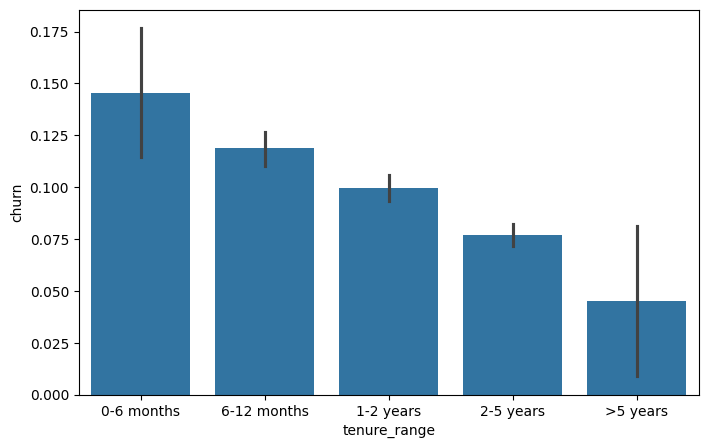

In [56]:

# Plotting a bar plot for tenure range
plt.figure(figsize=[8,5])
sns.barplot(x='tenure_range', y='churn', data= data)
plt.show()

It can be seen that the maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns.

In [57]:
data["avg_arpu_6_7"]= (data['arpu_6']+data['arpu_7'])/2
data['avg_arpu_6_7'].head()

0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: avg_arpu_6_7, dtype: float64

In [58]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
data.shape

(30001, 122)

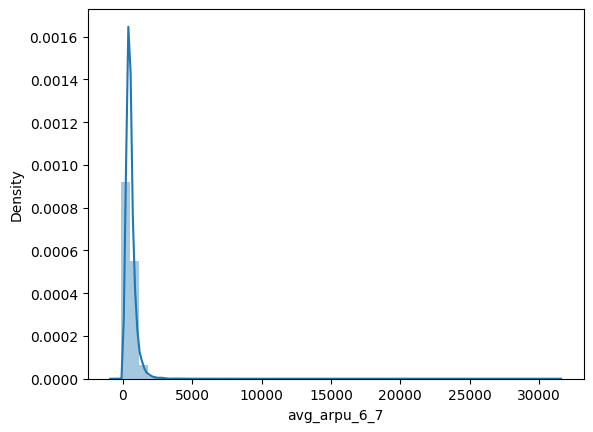

In [59]:
# Visualizing the column created
sns.distplot(data['avg_arpu_6_7'])
plt.show()

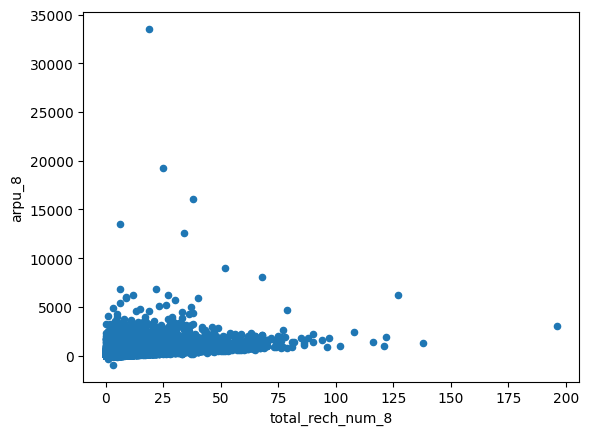

In [60]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

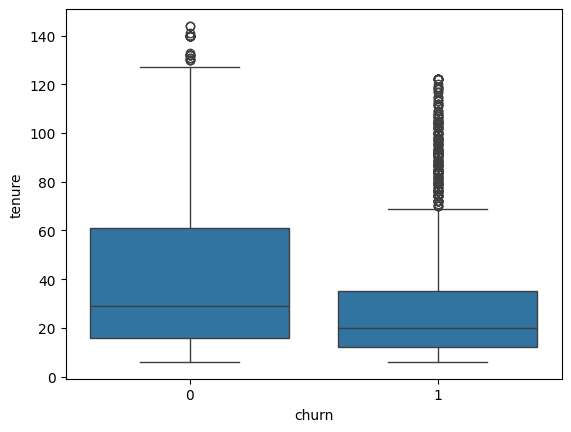

In [61]:
sns.boxplot(x = data.churn, y = data.tenure)

plt.show()

From the above plot , its clear tenured customers do no churn and they keep availing telecom services

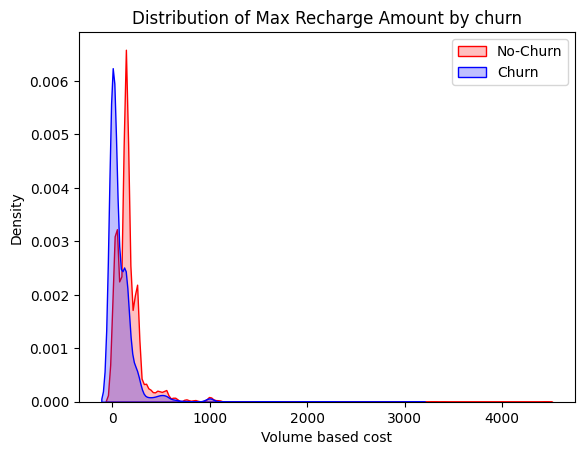

In [62]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(data.max_rech_amt_8[(data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data.max_rech_amt_8[(data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

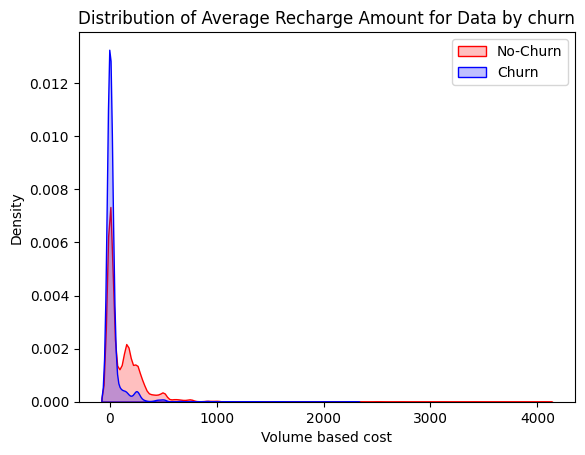

In [63]:
# churn vs max rechare amount
ax = sns.kdeplot(data.av_rech_amt_data_8[(data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data.av_rech_amt_data_8[(data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [64]:
# Creating categories for month 8 column totalrecharge and their count
data['total_rech_data_group_8']=pd.cut(data['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
data['total_rech_num_group_8']=pd.cut(data['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


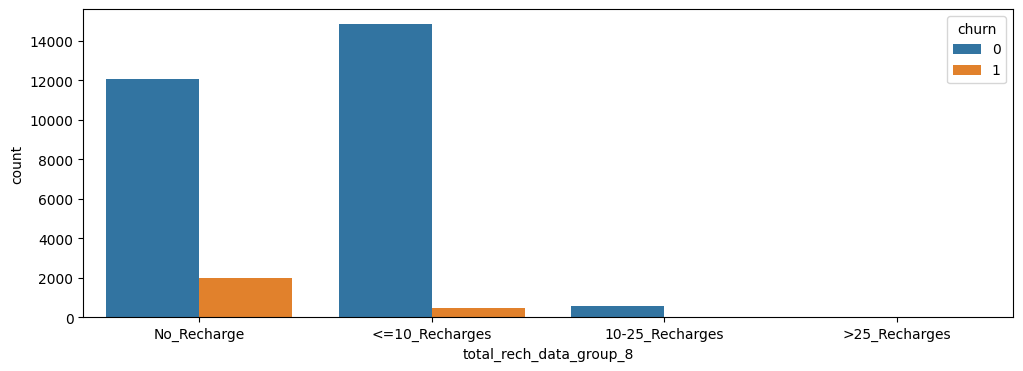

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges     8073
>25_Recharges       1996
No_Recharge          583
Name: total_rech_num_group_8, dtype: int64


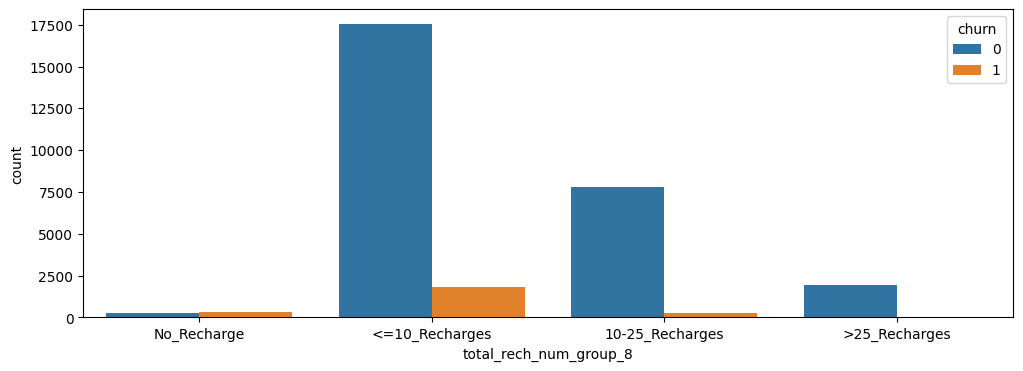

In [65]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=data,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",data['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=data,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",data['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [66]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 years,tenure_range_2-5 years,tenure_range_>5 years
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [67]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy], axis=1)
data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 years,tenure_range_2-5 years,tenure_range_>5 years
0,7.000843e+09,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,...,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,7.002124e+09,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,7.000887e+09,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [68]:
# Creating a copy of the filtered dataframe

tele_churn=data[:].copy()

# Dropping unwanted columns
tele_churn.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [69]:
# Cheking the dataset
tele_churn.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 years,tenure_range_2-5 years,tenure_range_>5 years
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,...,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [70]:
# lets create X dataset for model building.
X = tele_churn.drop(['churn'],axis=1)

In [71]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 years,tenure_range_2-5 years,tenure_range_>5 years
0,213.803,53.27,24.613333,0.00,84.23,23.993333,0.00,0.00,0.00,0.00,...,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.84,54.680000,52.29,453.43,567.160000,325.91,16.23,33.49,31.64,...,0,0,0,1,0,0,0,0,1,0
8,137.362,413.69,351.030000,35.08,94.66,80.630000,136.48,0.00,0.00,0.00,...,1,0,0,0,1,0,1,0,0,0
21,637.760,102.41,132.110000,85.14,757.93,896.680000,983.39,0.00,0.00,0.00,...,0,0,0,0,0,1,0,1,0,0
23,366.966,48.96,50.660000,33.58,85.41,89.360000,205.89,0.00,0.00,0.00,...,1,0,0,1,0,0,0,1,0,0


In [72]:
# lets create y dataset for model building.
y=tele_churn['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [73]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 127)
Dimension of X_test: (9001, 127)


In [74]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 15709 to 99093
Data columns (total 127 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   

In [75]:
numerical_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [76]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])

In [77]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 years,tenure_range_2-5 years,tenure_range_>5 years
15709,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,0,0
28202,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,1,0
14943,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,...,1,0,0,0,1,0,1,0,0,0
92007,0.081645,0.163879,0.105394,0.050406,0.142667,0.177782,0.052962,0.0,0.029033,0.0,...,1,0,0,1,0,0,0,0,1,0
56403,0.042893,0.079633,0.051881,0.004868,0.058346,0.046732,0.010097,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,1,0,0


### Data Imbalance Handling

#### Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further



In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [79]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 127)
Dimension of y_train_sm Shape: (38576,)


## Logistic Regression

In [80]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [81]:
# Logistic regression model
logm = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38449
Model Family:                Binomial   Df Model:                          126
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13893.
Date:                Mon, 11 Mar 2024   Deviance:                       27786.
Time:                        06:52:36   Pearson chi2:                 1.51e+14
No. Iterations:                   100   Pseudo R-squ. (CS):             0.4862
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.1686      0.174      6.727      0.000       0.828       1.509
arpu_8                                      6.0795      1.768      3.439      0.001       2.615       9.544
onnet_mou_6                               -56.1996     28.677     -1.960      0.050    -112.406       0.007
onnet_mou_7                                72.4232     16.667      4.345      0.000      39.756     105.091
onnet_mou_8                               154.0616     24.749      6.225      0.000     105.555     202.568
offnet_mou_6                              -52.8192     32.330     -1.634      0.102    -116.185      10.547
offnet_mou_7                               88.0811     19.710      4.469      0.000      49.451     126.712
offnet_mou_8                              197.5994     32.208      6.135      0.000     134.472     260.727
roam_ic_mou_6                               2.8821      0.847      3.402      0.001       1.222       4.543
roam_ic_mou_7                               5.4197      1.571      3.451      0.001       2.341       8.498
roam_ic_mou_8                              -1.6604      0.800     -2.075      0.038      -3.229      -0.092
roam_og_mou_6                              24.5214     14.650      1.674      0.094      -4.193      53.235
roam_og_mou_7                             -15.5297      3.904     -3.977      0.000     -23.182      -7.877
roam_og_mou_8                             -47.5911      8.004     -5.946      0.000     -63.278     -31.904
loc_og_t2t_mou_6                        -2007.7639   1.98e+04     -0.101      0.919   -4.08e+04    3.68e+04
loc_og_t2t_mou_7                        -1.821e+04   2.28e+04     -0.798      0.425   -6.29e+04    2.65e+04
loc_og_t2t_mou_8                         2.007e+05   3.41e+04      5.882      0.000    1.34e+05    2.68e+05
loc_og_t2m_mou_6                        -1484.7314   1.45e+04     -0.102      0.919      -3e+04     2.7e+04
loc_og_t2m_mou_7                        -1.097e+04   1.37e+04     -0.798      0.425   -3.79e+04     1.6e+04
loc_og_t2m_mou_8                         6.621e+04   1.13e+04      5.883      0.000    4.42e+04    8.83e+04
loc_og_t2f_mou_6                         -209.4040   2080.991     -0.101      0.920   -4288.072    3869.264
loc_og_t2f_mou_7                        -2618.9538   3263.003     -0.803      0.422   -9014.321    3776.414
loc_og_t2f_mou_8                         1.734e+04   2946.220      5.884      0.000    1.16e+04    2.31e+04
loc_og_t2c_mou_6                           -4.8281      1.055     -4.578      0.000      -6.895      -2.761
loc_og_t2c_mou_7                            0.3482      1.872      0.186      0.852      -3.321       4.018
loc_og_t2c_mou_8                            0.4098      1.2

### Logistic Regression using Feature Selection (RFE method)

In [82]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(lm,n_features_to_select=20)
rfe = rfe.fit(X_train_sm, y_train_sm)

In [83]:
rfe.support_

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False])

In [84]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8',
       'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [85]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', False, 22),
 ('onnet_mou_7', False, 37),
 ('onnet_mou_8', False, 38),
 ('offnet_mou_6', False, 35),
 ('offnet_mou_7', False, 21),
 ('offnet_mou_8', False, 31),
 ('roam_ic_mou_6', False, 13),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 58),
 ('roam_og_mou_6', False, 79),
 ('roam_og_mou_7', False, 30),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 64),
 ('loc_og_t2t_mou_7', False, 99),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 65),
 ('loc_og_t2m_mou_7', False, 87),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 100),
 ('loc_og_t2f_mou_7', False, 5),
 ('loc_og_t2f_mou_8', False, 24),
 ('loc_og_t2c_mou_6', False, 10),
 ('loc_og_t2c_mou_7', False, 72),
 ('loc_og_t2c_mou_8', False, 85),
 ('loc_og_mou_6', False, 46),
 ('loc_og_mou_7', False, 92),
 ('loc_og_mou_8', False, 2),
 ('std_og_t2m_mou_6', False, 103),
 ('std_og_t2f_mou_6', False, 95),
 ('std_og_t2f_mou_7', False, 27),
 ('std_og_t2f_mou_8',

### Assessing the model with StatsModels

In [86]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm1 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38555
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15846.
Date:                Mon, 11 Mar 2024   Deviance:                       31693.
Time:                        06:54:28   Pearson chi2:                 4.51e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4315
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5206      0.070      7.488      0.000       0.384       0.657
arpu_8                -6.5390      1.264     -5.172      0.000      -9.017      -4.061
roam_ic_mou_7          8.1565      0.922      8.845      0.000       6.349       9.964
roam_og_mou_8          3.9422      0.593      6.643      0.000       2.779       5.105
loc_og_t2m_mou_8      -4.2097      0.675     -6.240      0.000      -5.532      -2.888
std_og_mou_7           7.7284      0.513     15.051      0.000       6.722       8.735
total_og_mou_8       -20.6257      0.953    -21.651      0.000     -22.493     -18.759
loc_ic_t2t_mou_8       1.3306      4.053      0.328      0.743      -6.613       9.274
loc_ic_t2m_mou_6       7.9828      0.633     12.618      0.000       6.743       9.223
loc_ic_t2m_mou_8      -7.0240      4.463     -1.574      0.116     -15.771       1.723
loc_ic_mou_8         -25.7369      4.959     -5.190      0.000     -35.457     -16.017
std_ic_mou_8         -11.9332      1.358     -8.785      0.000     -14.595      -9.271
spl_ic_mou_8         -19.4630      1.357    -14.342      0.000     -22.123     -16.803
total_rech_num_8      -7.1728      0.531    -13.503      0.000      -8.214      -6.132
last_day_rch_amt_8   -18.6093      0.816    -22.811      0.000     -20.208     -17.010
total_rech_data_8     -9.0125      0.615    -14.665      0.000     -10.217      -7.808
av_rech_amt_data_8    -5.3795      0.641     -8.396      0.000      -6.635      -4.124
vol_2g_mb_8          -10.5047      0.935    -11.233      0.000     -12.338      -8.672
monthly_2g_8          -5.8189      0.361    -16.138      0.000      -6.526      -5.112
aug_vbc_3g            -6.8808      0.587    -11.724      0.000      -8.031      -5.730
avg_arpu_6_7          18.7558      1.083     17.313      0.000      16.632      20.879
======================================================================================
"""

In [87]:
# From the p-value of the individual columns,
    # we can drop the column 'loc_ic_t2t_mou_8' as it has high p-value of 0.743
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g',
       'avg_arpu_6_7'],
      dtype='object')


In [88]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm1 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38556
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15846.
Date:                Mon, 11 Mar 2024   Deviance:                       31693.
Time:                        06:54:28   Pearson chi2:                 4.54e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4315
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5199      0.069      7.481      0.000       0.384       0.656
arpu_8                -6.5398      1.264     -5.173      0.000      -9.018      -4.062
roam_ic_mou_7          8.1600      0.922      8.846      0.000       6.352       9.968
roam_og_mou_8          3.9436      0.594      6.645      0.000       2.780       5.107
loc_og_t2m_mou_8      -4.2120      0.675     -6.244      0.000      -5.534      -2.890
std_og_mou_7           7.7239      0.513     15.048      0.000       6.718       8.730
total_og_mou_8       -20.6172      0.952    -21.650      0.000     -22.484     -18.751
loc_ic_t2m_mou_6       7.9816      0.633     12.615      0.000       6.741       9.222
loc_ic_t2m_mou_8      -8.2950      2.207     -3.758      0.000     -12.621      -3.969
loc_ic_mou_8         -24.2271      1.832    -13.226      0.000     -27.817     -20.637
std_ic_mou_8         -11.9425      1.358     -8.792      0.000     -14.605      -9.280
spl_ic_mou_8         -19.4596      1.357    -14.340      0.000     -22.119     -16.800
total_rech_num_8      -7.1653      0.531    -13.502      0.000      -8.205      -6.125
last_day_rch_amt_8   -18.6164      0.816    -22.828      0.000     -20.215     -17.018
total_rech_data_8     -9.0143      0.615    -14.669      0.000     -10.219      -7.810
av_rech_amt_data_8    -5.3838      0.641     -8.405      0.000      -6.639      -4.128
vol_2g_mb_8          -10.5039      0.935    -11.233      0.000     -12.337      -8.671
monthly_2g_8          -5.8200      0.361    -16.142      0.000      -6.527      -5.113
aug_vbc_3g            -6.8857      0.587    -11.736      0.000      -8.036      -5.736
avg_arpu_6_7          18.7660      1.083     17.329      0.000      16.644      20.888
======================================================================================
"""

In [89]:
# From the p-value of the individual columns,
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_8', 'roam_ic_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_arpu_6_7'],
      dtype='object')


In [90]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm1 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38557
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15853.
Date:                Mon, 11 Mar 2024   Deviance:                       31707.
Time:                        06:54:29   Pearson chi2:                 4.89e+10
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4313
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5024      0.069      7.245      0.000       0.367       0.638
arpu_8                -6.6003      1.263     -5.225      0.000      -9.076      -4.124
roam_ic_mou_7          8.0300      0.924      8.695      0.000       6.220       9.840
roam_og_mou_8          4.0048      0.594      6.745      0.000       2.841       5.168
loc_og_t2m_mou_8      -4.7687      0.659     -7.235      0.000      -6.061      -3.477
std_og_mou_7           7.5689      0.511     14.804      0.000       6.567       8.571
total_og_mou_8       -20.3778      0.949    -21.480      0.000     -22.237     -18.518
loc_ic_t2m_mou_6       7.3666      0.600     12.285      0.000       6.191       8.542
loc_ic_mou_8         -30.1343      1.025    -29.393      0.000     -32.144     -28.125
std_ic_mou_8         -11.9659      1.358     -8.812      0.000     -14.627      -9.304
spl_ic_mou_8         -19.4892      1.356    -14.370      0.000     -22.147     -16.831
total_rech_num_8      -7.2814      0.530    -13.747      0.000      -8.320      -6.243
last_day_rch_amt_8   -18.6358      0.816    -22.835      0.000     -20.235     -17.036
total_rech_data_8     -9.0088      0.614    -14.666      0.000     -10.213      -7.805
av_rech_amt_data_8    -5.3969      0.641     -8.424      0.000      -6.653      -4.141
vol_2g_mb_8          -10.5478      0.935    -11.284      0.000     -12.380      -8.716
monthly_2g_8          -5.7884      0.360    -16.066      0.000      -6.495      -5.082
aug_vbc_3g            -6.9163      0.587    -11.790      0.000      -8.066      -5.767
avg_arpu_6_7          19.1520      1.080     17.738      0.000      17.036      21.268
======================================================================================
"""

In [91]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([1.38761406e-01, 3.89688786e-01, 3.46718629e-01, 4.15978093e-01,
       5.38361964e-01, 4.31553827e-01, 2.40147649e-05, 2.28592910e-01,
       2.20899890e-02, 6.88433397e-01])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [92]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.138761
1,0,0.389689
2,0,0.346719
3,0,0.415978
4,0,0.538362


#### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [93]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.138761,0
1,0,0.389689,0
2,0,0.346719,0
3,0,0.415978,0
4,0,0.538362,1


In [94]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[15666  3622]
 [ 2804 16484]]


In [95]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.8334197428452924


In [96]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,spl_ic_mou_8,82.27
8,std_ic_mou_8,43.19
0,arpu_8,18.85
6,loc_ic_t2m_mou_6,18.69
5,total_og_mou_8,5.46
12,total_rech_data_8,3.58
4,std_og_mou_7,3.27
15,monthly_2g_8,2.76
3,loc_og_t2m_mou_8,2.54
7,loc_ic_mou_8,2.54


##### Metrics beyond simply accuracy

In [98]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8546246370800498
Specificity =  0.8122148486105351
False Positive Rate =  0.18778515138946494
Precision =  0.8198547697204814
True Negative Prediction Rate =  0.8481862479696806


#### Plotting the ROC Curve

In [100]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [101]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

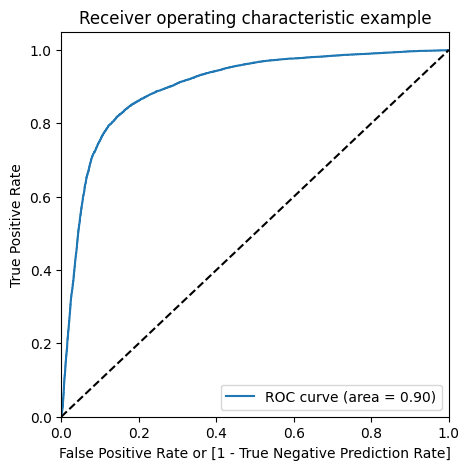

In [102]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [103]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.138761,0,1,1,0,0,0,0,0,0,0,0
1,0,0.389689,0,1,1,1,1,0,0,0,0,0,0
2,0,0.346719,0,1,1,1,1,0,0,0,0,0,0
3,0,0.415978,0,1,1,1,1,1,0,0,0,0,0
4,0,0.538362,1,1,1,1,1,1,1,0,0,0,0


In [104]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_data = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_data.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_data)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.686774     0.977292     0.396257
0.2          0.2  0.751815     0.957383     0.546246
0.3          0.3  0.791140     0.925705     0.656574
0.4          0.4  0.816674     0.891487     0.741860
0.5          0.5  0.833420     0.854625     0.812215
0.6          0.6  0.835727     0.805112     0.866342
0.7          0.7  0.820121     0.729158     0.911085
0.8          0.8  0.756196     0.563718     0.948673
0.9          0.9  0.613283     0.245800     0.980765


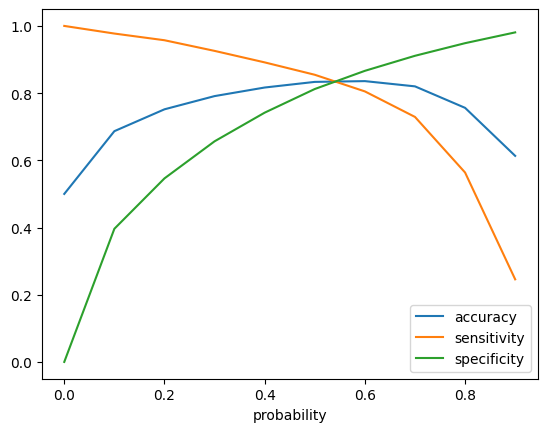

In [105]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_data.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Initially we selected the optimm point of classification as 0.5.

From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.

In [106]:
# Let's create columns with refined probability cutoffs
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.138761,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.389689,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.346719,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.415978,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.538362,1,1,1,1,1,1,1,0,...,0,1,1,1,0,0,0,0,0,0


In [107]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_data = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_data.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_data)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.833420     0.854625     0.812215
0.51         0.51  0.834638     0.850684     0.818592
0.52         0.52  0.835442     0.846381     0.824502
0.53         0.53  0.835805     0.841352     0.830257
0.54         0.54  0.836116     0.836012     0.836219
0.55         0.55  0.836297     0.830724     0.841871
0.56         0.56  0.836323     0.826109     0.846537
0.57         0.57  0.836660     0.821547     0.851773
0.58         0.58  0.836712     0.816103     0.857321
0.59         0.59  0.836142     0.810556     0.861727


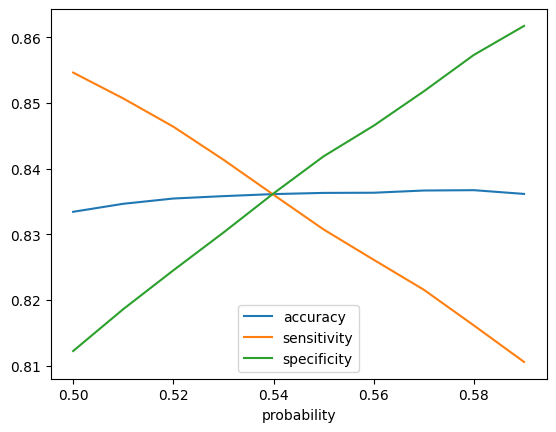

In [108]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_data.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.54

In [109]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.54 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,...,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.138761,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.389689,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.346719,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.415978,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.538362,1,1,1,1,1,1,1,0,...,1,1,1,0,0,0,0,0,0,0


In [110]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8361157196184156


In [111]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16129  3159]
 [ 3163 16125]]


In [112]:
TP2 = confusion2[1,1] # true positive
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8360120282040647
Specificity =  0.8362194110327665
False Positive Rate =  0.16378058896723352
Precision =  0.8361854387056628
True Negative Prediction Rate =  0.8360460294422558


#### Precision and recall tradeoff

In [113]:
from sklearn.metrics import precision_recall_curve

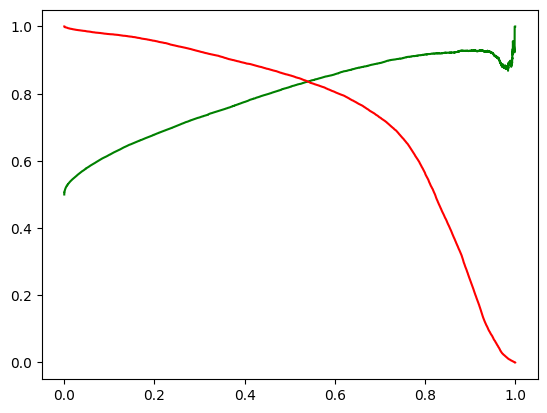

In [114]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set

##### Transforming and feature selection for test data

In [115]:
# Scaling the test data
X_test[numerical_col] = scaler.transform(X_test[numerical_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 years,tenure_range_2-5 years,tenure_range_>5 years
35865,0.026143,0.021027,0.000000,0.000070,0.003412,0.000575,0.000000,0.0,0.000000,0.000000,...,0,0,0,1,0,0,1,0,0,0
41952,0.048190,0.005702,0.005250,0.002058,0.011146,0.023873,0.007510,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,0,1,0
98938,0.061230,0.003275,0.037889,0.008157,0.010851,0.025458,0.018789,0.0,0.000000,0.000000,...,1,0,0,1,0,0,0,0,0,0
29459,0.042998,0.020180,0.000963,0.000297,0.001588,0.003828,0.000573,0.0,0.000000,0.000000,...,1,0,0,1,0,0,1,0,0,0
70682,0.098384,0.005699,0.011111,0.039505,0.084425,0.242612,0.135335,0.0,0.000721,0.000521,...,1,0,0,0,1,0,0,1,0,0


In [116]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_8,roam_ic_mou_7,roam_og_mou_8,loc_og_t2m_mou_8,std_og_mou_7,total_og_mou_8,loc_ic_t2m_mou_6,loc_ic_mou_8,std_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,monthly_2g_8,aug_vbc_3g,avg_arpu_6_7
35865,0.026143,0.000000,0.000000,0.000000,0.000000,0.000053,0.003225,0.002782,0.009587,0.000000,0.010204,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.059622
41952,0.048190,0.000000,0.000000,0.005379,0.018971,0.009067,0.002868,0.022029,0.008684,0.000000,0.020408,0.011238,0.017544,0.035705,0.004586,0.0,0.019572,0.075152
98938,0.061230,0.000000,0.000000,0.073716,0.000374,0.024987,0.055421,0.183375,0.003706,0.000000,0.035714,0.029220,0.035088,0.124107,0.056568,0.0,0.211621,0.095894
29459,0.042998,0.000000,0.000000,0.000000,0.000000,0.000800,0.002576,0.000037,0.011386,0.000000,0.025510,0.034615,0.052632,0.063039,0.008221,0.2,0.068735,0.070960
70682,0.098384,0.000721,0.031491,0.041749,0.172443,0.157573,0.028465,0.066205,0.002352,0.080257,0.061224,0.029220,0.017544,0.005664,0.000000,0.0,0.000000,0.101081


In [117]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

#### Predicting the target variable

In [118]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865    0.772346
41952    0.479441
98938    0.000358
29459    0.127641
70682    0.008658
58317    0.229879
4860     0.008023
16890    0.710022
61329    0.665203
94332    0.454458
dtype: float64


In [119]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.772346
41952,0.479441
98938,0.000358
29459,0.127641
70682,0.008658


In [120]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [121]:
y_test_data = pd.DataFrame(y_test)
y_test_data.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [122]:
y_pred_final = pd.concat([y_test_data,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
35865,0,0.772346
41952,0,0.479441
98938,0,0.000358
29459,0,0.127641
70682,0,0.008658


In [123]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.772346,1
41952,0,0.479441,0
98938,0,0.000358,0
29459,0,0.127641,0
70682,0,0.008658,0


In [124]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8255749361182091

#### Metrics Evaluation

In [125]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6850 1422]
 [ 148  581]]


In [158]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [159]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7969821673525377
Specificity =  0.8280947775628626
False Positive Rate =  0.17190522243713732
Precision =  0.29006490264603096
True Negative Prediction Rate =  0.9788511003143755


### Explaining the results

In [160]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n")

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



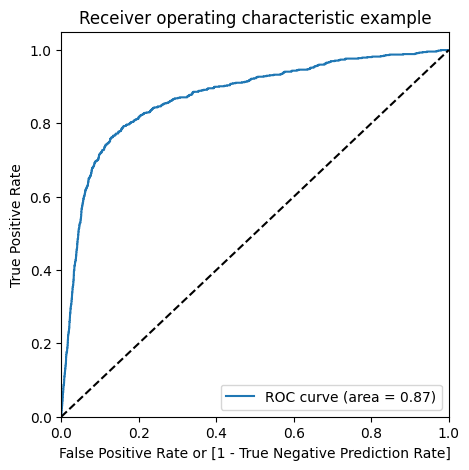

In [161]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

##### The AUC score for train dataset is 0.90 and the test dataset is 0.87.
This model can be considered as a good model.

### Logistic Regression using PCA

In [162]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_test[numerical_col] = scaler.transform(X_test[numerical_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 127)
Dimension of X_test: (9001, 127)
Dimension of X_train_sm Shape: (38576, 127)
Dimension of y_train_sm Shape: (38576,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 months,tenure_range_1-2 years,tenure_range_2-5 years,tenure_range_>5 years
0,0.038904,0.000235,0.000531,0.000238,0.004211,0.003651,0.004095,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,0,0
1,0.032921,0.000493,0.000000,0.000000,0.001631,0.000000,0.000000,0.0,0.000000,0.0,...,1,0,0,1,0,0,0,0,1,0
2,0.033826,0.000876,0.000275,0.000714,0.003861,0.007485,0.003679,0.0,0.000000,0.0,...,1,0,0,0,1,0,1,0,0,0
3,0.081645,0.163879,0.105394,0.050406,0.142667,0.177782,0.052962,0.0,0.029033,0.0,...,1,0,0,1,0,0,0,0,1,0
4,0.042893,0.079633,0.051881,0.004868,0.058346,0.046732,0.010097,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,1,0,0


In [163]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [164]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 127)
Dimension of X_test_pca:  (9001, 127)


In [165]:
#Viewing the PCA components
pca.components_

array([[ 1.78194321e-02,  5.44275559e-03,  1.26461825e-02, ...,
        -9.22864518e-02,  2.12204448e-01, -1.95745809e-04],
       [ 7.58823363e-04,  1.19483728e-03,  3.45262976e-03, ...,
         6.53344004e-01, -7.06931870e-01, -9.73633957e-05],
       [ 8.54572543e-03, -2.25712040e-02, -1.45869733e-02, ...,
         1.32483678e-01,  3.66663604e-02,  1.42181908e-03],
       ...,
       [-3.01705447e-07,  1.71694080e-06, -3.05130500e-06, ...,
        -2.40021369e-08, -4.01284636e-09,  3.34304404e-08],
       [ 2.12143915e-07, -2.06910894e-06,  1.32294742e-06, ...,
         1.04745495e-08,  5.39068955e-09, -1.44986445e-08],
       [ 0.00000000e+00,  2.64230209e-15, -2.26097942e-15, ...,
        -2.63804609e-18, -3.81565471e-18, -1.11062359e-17]])

**Tuning hyperparameter C**

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [166]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [167]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [168]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'recall',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_sm_pca, y_train_sm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [191]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.264780,0.013552,0.009034,0.000281,0.01,{'C': 0.01},0.756467,0.752572,0.769872,0.768135,...,0.759151,0.008428,6,0.760494,0.759221,0.760469,0.758750,0.760901,0.759967,0.000829
1,0.988103,0.208102,0.013415,0.004653,0.1,{'C': 0.1},0.812386,0.813014,0.825906,0.830311,...,0.819481,0.007271,5,0.821680,0.822532,0.819947,0.819873,0.821308,0.821068,0.001026
2,0.936042,0.043387,0.009919,0.001561,1,{'C': 1},0.839822,0.842335,0.848058,0.857772,...,0.846019,0.006474,4,0.848587,0.849610,0.846547,0.846124,0.845315,0.847237,0.001604
3,1.010134,0.146846,0.011502,0.003130,10,{'C': 10},0.846616,0.851852,0.859004,0.869689,...,0.856537,0.007752,3,0.860746,0.860000,0.857550,0.857078,0.858098,0.858694,0.001428
4,1.263670,0.389339,0.010489,0.002497,100,{'C': 100},0.850274,0.856224,0.860829,0.873575,...,0.859904,0.007690,1,0.860358,0.864805,0.859556,0.859347,0.859655,0.860744,0.002059
5,0.937959,0.045523,0.008861,0.000299,1000,{'C': 1000},0.849490,0.853652,0.864738,0.870984,...,0.859187,0.007735,2,0.861587,0.862857,0.861109,0.857661,0.858552,0.860353,0.001942


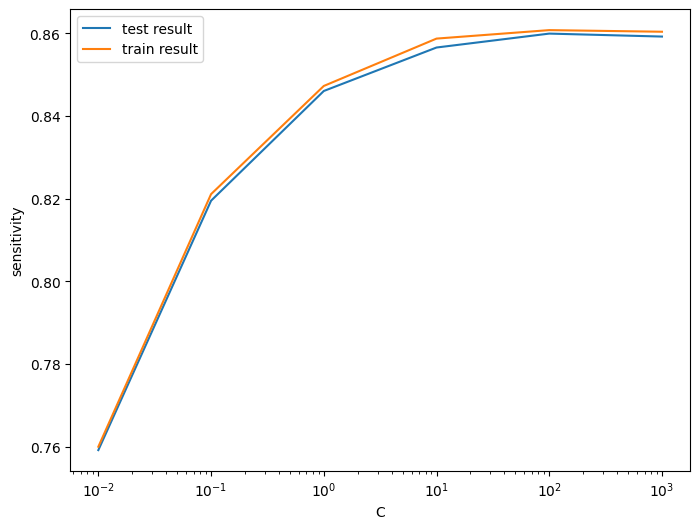

In [192]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [194]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8599039358509829 at C = 100


#### Performing Logistic Regression with PCA

In [195]:
#Instantiating the model with best C
logreg_pca = LogisticRegression(C=best_C)
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_data = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_data.shape)

Dimension of y_pred_df: (9001, 1)


In [196]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6765 1507]
 [ 126  603]] 

Accuracy of the logistic regression model with PCA:  0.8185757138095767


In [197]:
confusion_matrix1= metrics.confusion_matrix(y_test,y_pred)

In [198]:
TP4 = confusion_matrix1[1,1] # true positive
TN4 = confusion_matrix1[0,0] # true negatives
FP4 = confusion_matrix1[0,1] # false positives
FN4 = confusion_matrix1[1,0] # false negatives

In [199]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP4 / float(TP4+FN4))

# Let us calculate specificity
print("Specificity = ",TN4 / float(TN4+FP4))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP4/ float(TN4+FP4))

# positive predictive value
print ("Precision = ",TP4 / float(TP4+FP4))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN4 / float(TN4+FN4))

Sensitivity =  0.8271604938271605
Specificity =  0.8178191489361702
False Positive Rate =  0.18218085106382978
Precision =  0.285781990521327
True Negative Prediction Rate =  0.9817152808010449


In [200]:
from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8272
           1       0.29      0.83      0.42       729

    accuracy                           0.82      9001
   macro avg       0.63      0.82      0.66      9001
weighted avg       0.93      0.82      0.85      9001



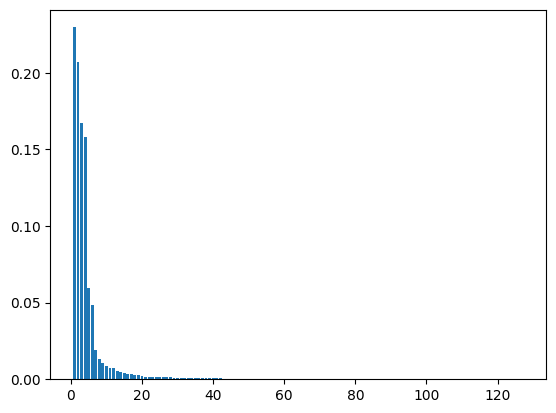

In [201]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

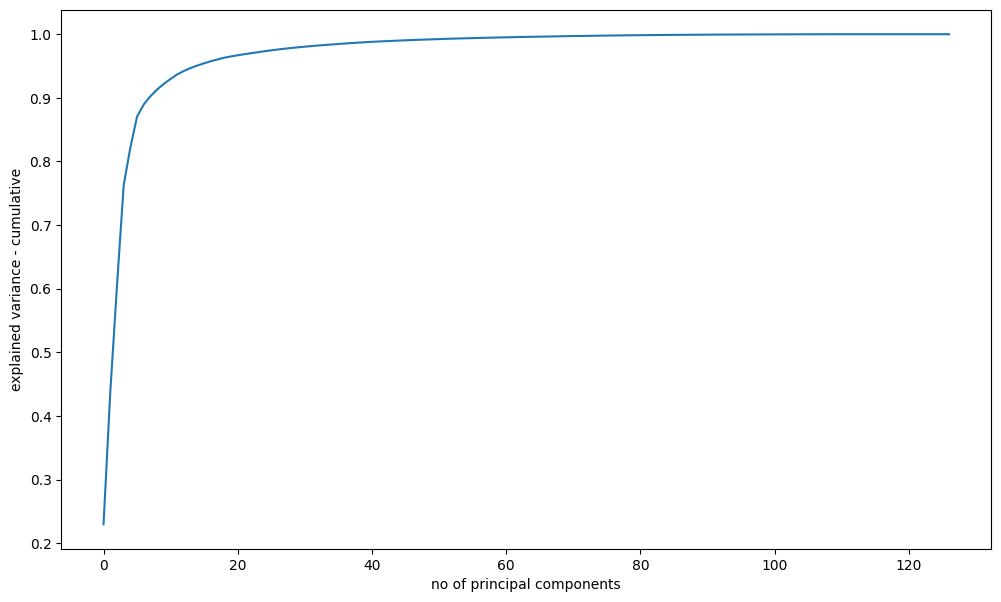

In [202]:
var_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumsum)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [203]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([23. , 43.7, 60.4, 76.2, 82.1, 87. , 88.9, 90.2, 91.3, 92.2, 93. ,
       93.7, 94.2, 94.7, 95.1, 95.4, 95.7, 96. , 96.3, 96.5, 96.7, 96.9,
       97.1, 97.3, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2])

*96% of the data can be explained with 20 PCA components

##### Fitting the dataset with the 20 explainable components

In [204]:
pca_20 = PCA(n_components=20)#for explaining 96% of the data

train_pca_20 = pca_20.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_20.shape)

test_pca_20 = pca_20.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_20.shape)

Dimension for Train dataset using PCA:  (38576, 20)
Dimension for Test dataset using PCA:  (9001, 20)


In [205]:
logreg_pca_20 = LogisticRegression()
logreg_pca_20.fit(train_pca_20, y_train_sm)

# making the predictions
y_pred_20 = logreg_pca_20.predict(test_pca_20)

# converting the prediction into a dataframe
y_pred_df_20 = pd.DataFrame(y_pred_20)
print("Dimension of y_pred_df_20: ", y_pred_df_20.shape)

Dimension of y_pred_df_20:  (9001, 1)


In [206]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_20),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_20))

Confusion Matirx for y_test & y_pred
 [[6468 1804]
 [ 175  554]] 

Accuracy of the logistic regression model with PCA:  0.7801355404955005


In [207]:
confusion_matrix2=metrics.confusion_matrix(y_test,y_pred_20)

In [208]:
TP5 = confusion_matrix2[1,1] # true positive
TN5 = confusion_matrix2[0,0] # true negatives
FP5 = confusion_matrix2[0,1] # false positives
FN5 = confusion_matrix2[1,0] # false negatives

In [209]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP5 / float(TP5+FN5))

# Let us calculate specificity
print("Specificity = ",TN5 / float(TN5+FP5))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP5/ float(TN5+FP5))

# positive predictive value
print ("Precision = ",TP5 / float(TP5+FP5))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN5 / float(TN5+FN5))

Sensitivity =  0.7599451303155007
Specificity =  0.7819148936170213
False Positive Rate =  0.21808510638297873
Precision =  0.23494486853265478
True Negative Prediction Rate =  0.9736564805057956


In [210]:
from sklearn.metrics import classification_report
print('Classification Report:\n',classification_report(y_test,y_pred_20))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.87      8272
           1       0.23      0.76      0.36       729

    accuracy                           0.78      9001
   macro avg       0.60      0.77      0.61      9001
weighted avg       0.91      0.78      0.83      9001



**Final Model Suggestion**

The Logistic Regression model with PCA having 20 components to explain the 96 percent of the dataset is found performing well with test accuracy 78% and recall 76% . This model can be used as final model for predicting the churners.

***IMPORTANT FEATURES THAT CONTRIBUTE TO CHURN***

In [185]:
lm = LogisticRegression(class_weight = 'balanced')
lm.fit(X_train_sm[rfe_columns_2],y_train_sm)

LogisticRegression(class_weight='balanced')

In [186]:
list_coef = []
for i in list(lm.coef_):
  for j in i:
    list_coef.append(j)

In [187]:
len(list_coef)

18

In [188]:
imp_fea = pd.DataFrame({'Features':list(X_train_sm[rfe_columns_2].columns),'coefficient':list_coef})

In [189]:
imp_fea.set_index('Features',inplace = True)
imp_fea.sort_values(by='coefficient',ascending = False)

,coefficient
Features,
avg_arpu_6_7,11.348846
std_og_mou_7,6.519303
roam_ic_mou_7,5.132249
roam_og_mou_8,5.001773
loc_ic_t2m_mou_6,3.941190
aug_vbc_3g,-5.948470
monthly_2g_8,-5.953373
std_ic_mou_8,-6.004915
av_rech_amt_data_8,-6.111606


In [190]:
imp_fea['Importance']=round((imp_fea.coefficient.apply(np.abs)/imp_fea.coefficient.apply(np.abs).sum())*100,1)
imp_fea.sort_values('Importance',ascending=False)

,coefficient,Importance
Features,,
loc_ic_mou_8,-18.674117,12.5
total_og_mou_8,-15.840262,10.6
last_day_rch_amt_8,-12.591685,8.5
avg_arpu_6_7,11.348846,7.6
total_rech_data_8,-8.535582,5.7
spl_ic_mou_8,-8.185515,5.5
total_rech_num_8,-7.532780,5.1
arpu_8,-7.452514,5.0
loc_og_t2m_mou_8,-7.198511,4.8


**Inference**

The above are the top 18 features that contribute to the churn variable.Most of the features are negative coefficients indicating that they are inversely proportional to the dependent variable.
1) For instance, the lesser ('loc_ic_mou_8')the time spent by the customers on the incoming call on the 8th month indicates the possibility of churn is high.

**Visualizing the important features that contributes to churners and non-churners**


In [213]:
# Creating churn dataframe
tele_churn = data[data['churn'] == 1]
# Creating not churn dataframe
tele_non_churn = data[data['churn'] == 0]

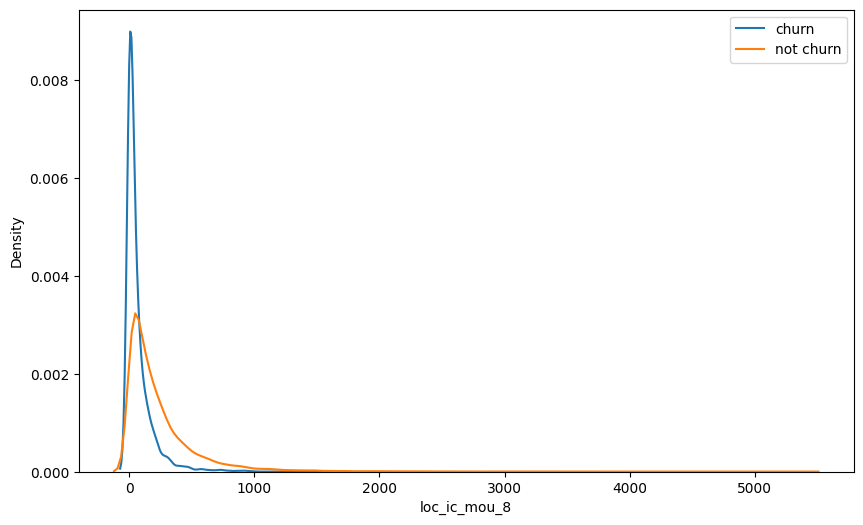

In [216]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(tele_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(tele_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.legend()
plt.show()

As we can see, the lesser the time spent by customers on local incoming calls in 8th(August) month have high probability to churn.

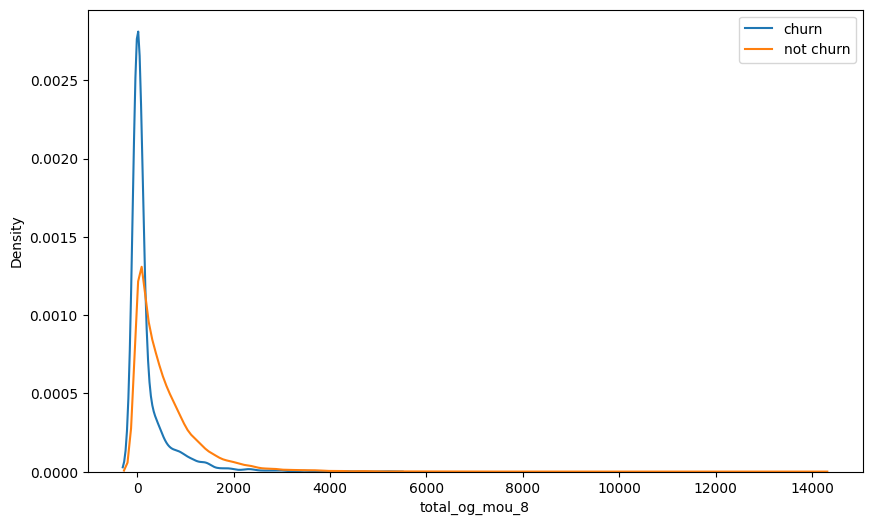

In [219]:
# Plotting total_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(tele_churn['total_og_mou_8'],label='churn',hist=False)
sns.distplot(tele_non_churn['total_og_mou_8'],label='not churn',hist=False)
plt.legend()
plt.show()

Again we can see, the lesser the time spent by customers on total outgoing calls in 8th(August) month have high probability to churn.

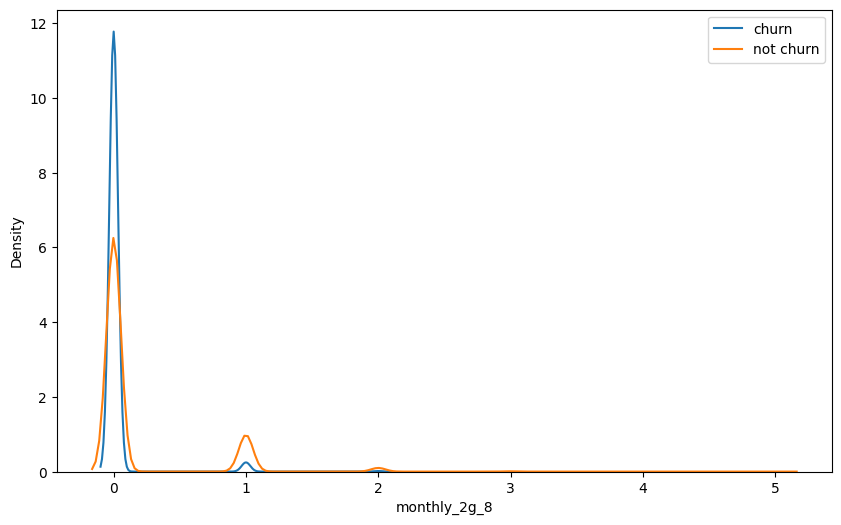

In [223]:
# Plotting monthly_2g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(tele_churn['monthly_2g_8'],label='churn',hist=False)
sns.distplot(tele_non_churn['monthly_2g_8'],label='not churn',hist=False)
plt.legend()
plt.show()

We can see that those who do not recharge monthly 2g data for 8th month are likely to churn(densed around zero).

Likewise, we can plot different graph against the churn variable with the help of the other important features mentioned above.